### 【問題1】ラグランジュの未定乗数法による最急降下
SVMの学習は、ラグランジュの未定乗数法を用います。<br>
サンプル数分のラグランジュ乗数 $\lambda$ を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。<br>
<br>
　　　　$ \lambda_i^{new} = \lambda_i + \alpha(1 - \displaystyle\sum_{j=1}^{n}\lambda_j y_i y_j k(x_i, x_j)) $ <br>
<br>
ここで $k(x_i, x_j)$ はカーネル関数です。線形カーネルの場合は次のようになります。他のカーネル関数にも対応できるように、この部分は独立したメソッドとしておきましょう。<br>
<br>
　　　　$ k(x_i, x_j) = x_i^T x_j $ <br>
<br>
条件として、更新毎に $\lambda_i >= 0$を満たす必要があります。満たさない場合は $\lambda_i = 0$とします。<br>
　　　　$i, j$ : サンプルのインデックス<br>
　　　　$\lambda_i^{new}$ : 更新後のi番目のサンプルのラグランジュ乗数<br>
　　　　$\lambda_i$ : 更新前のi番目のサンプルのラグランジュ乗数<br>
　　　　$\alpha$ : 学習率<br>
　　　　$\lambda_j$ : j番目のサンプルのラグランジュ乗数<br>
　　　　$y_i$ : i番目のサンプルのラベル<br>
　　　　$y_j$ : j番目のサンプルのラベル<br>
　　　　$x_i$ : i番目のサンプルの特徴量ベクトル<br>
　　　　$x_j$ : j番目のサンプルの特徴量ベクトル<br>
<br>
あるサンプルに対してのすべてのサンプルとの関係を計算していくことになります。<br>


In [85]:
import numpy as np


class TEST_CLASS():
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

        # ランダム値を固定化
        np.random.seed(0)

    def lagrange_method(self, X, y):
        # ラグランジュ乗数(X[0]分のベクトル)をランダムに設定
        self.lagrange_multiplier = np.random.random(X.shape[0])

        # ラグランジュの未定乗数法による最急降下
        num = 0
        for i in range(X.shape[0]):
            for j in range(X.shape[0]):
                num += self.lagrange_multiplier[j]*y[i]*y[j]*kernel_function(X[i], X[j])
            print(num)
            lagrange_num = self.lagrange_multiplier[i] + self.lr * (1 - num)
            if lagrange_num >= 0:
                self.lagrange_multiplier[i] = lagrange_num
            else:
                self.lagrange_multiplier[i] = 0

        print(self.lagrange_multiplier)

"""
    def lagrange_method(self, X, y):
        # ラグランジュ乗数(X[0]分のベクトル)をランダムに設定
        self.lagrange_multiplier = np.random.random(X.shape[0])

        # ラグランジュの未定乗数法による最急降下
        num = 0
        for i in range(X.shape[0]):
            for j in range(X.shape[0]):
                num += self.lagrange_multiplier[j]*y[i]*y[j]*kernel_function(X[i], X[j])

        # ラグランジュ乗数の更新
        for i in range(X.shape[0]):
            print(self.lagrange_multiplier[i] + self.lr * (1 - num))
            if (self.lagrange_multiplier[i] + self.lr * (1 - num)) >= 0:
                self.lagrange_multiplier[i] = self.lagrange_multiplier[i] + self.lr * (1 - num)
            else:
                self.lagrange_multiplier[i] = 0

        print(self.lagrange_multiplier)
"""

def kernel_function(vector_a, vector_b):

    # 「線形カーネル」数の計算
#     kernel_num = vector_a.T@vector_b
    vector_c = vector_a.reshape(vector_a.shape[0],1)
    vector_d = vector_b.reshape(vector_a.shape[0],1)
    kernel_num = vector_c.T@vector_d

    return kernel_num


X = np.array([[0.1, 0.1, 0.1, 0.1],
              [0.2, 0.2, 0.2, 0.2],
              [0.3, 0.3, 0.3, 0.3]])
y = np.array([0.1, 0.2, 0.3])
print(X.shape)
print(y.shape)

#################################################################
from sklearn.preprocessing import StandardScaler
# インスタンス化
scaler = StandardScaler()
# 訓練用のデータのみを.fitで標準化 ※説明変数のみ
scaler.fit(X)
# 訓練用、検証用双方のデータにtransformで標準化 ※説明変数のみ
tr_X = scaler.transform(X)

test = TEST_CLASS(num_iter=10, lr=1, kernel="linear", threshold=1e-5, verbose=False)
test.lagrange_method(tr_X, y)
#################################################################


(3, 4)
(3,)
[[-0.0755686]]
[[-0.0755686]]
[[-0.04246515]]
[1.6243821  1.79075796 1.64522853]


### 【問題2】サポートベクターの決定
計算したラグランジュ乗数 $ \lambda $ が設定した閾値より大きいサンプルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。<br>

閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。<br>

In [86]:
import numpy as np


class TEST_CLASS():
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold # ←　これがサポートベクターの初期値になるが、サポートベクターではない
        self.verbose = verbose

        # サポートベクター数の初期値
        self.support_bector_num = 2

        # ランダム値を固定化
        np.random.seed(0)

    def lagrange_method(self, X, y):
        # ラグランジュ乗数(X[0]分のベクトル)をランダムに設定
        self.lagrange_multiplier = np.random.random(X.shape[0])

        # ラグランジュの未定乗数法による最急降下
        num = 0
        for i in range(X.shape[0]):
            for j in range(X.shape[0]):
                num += self.lagrange_multiplier[j]*y[i]*y[j]*kernel_function(X[i], X[j])
            print(num)
            lagrange_num = self.lagrange_multiplier[i] + self.lr * (1 - num)
            if lagrange_num >= 0:
                self.lagrange_multiplier[i] = lagrange_num
            else:
                self.lagrange_multiplier[i] = 0

        print(self.lagrange_multiplier)

        """
        self.n_support_vectors : int
          サポートベクターの数
        self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
          サポートベクターのインデックス
        self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
          サポートベクターの特徴量
        self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
          サポートベクターの未定乗数
        self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
          サポートベクターのラベル
        """

        self.support_vector = []
        self.n_support_vectors = 0
        # サポートベクターの更新
        for i in range(self.lagrange_multiplier.shape[0]):
            # 初期値より大きいか→更新した値より大きいか
            if self.lagrange_multiplier[i] > self.threshold:
                self.support_vector.append(self.lagrange_multiplier[i])
                self.n_support_vectors += 1
#         print(self.support_vector)


def kernel_function(vector_a, vector_b):

    # 「線形カーネル」数の計算
    kernel_num = vector_a.T@vector_b
#     vector_c = vector_a.reshape(vector_a.shape[0],1)
#     vector_d = vector_b.reshape(vector_a.shape[0],1)
#     kernel_num = vector_c.T@vector_d

#     print(kernel_num)

    return kernel_num


X = np.array([[0.1, 0.1, 0.1, 0.1],
              [0.2, 0.2, 0.2, 0.2],
              [0.3, 0.3, 0.3, 0.3]])
y = np.array([0.1, 0.2, 0.3])

#################################################################
from sklearn.preprocessing import StandardScaler
# インスタンス化
scaler = StandardScaler()
# 訓練用のデータのみを.fitで標準化 ※説明変数のみ
scaler.fit(X)
# 訓練用、検証用双方のデータにtransformで標準化 ※説明変数のみ
tr_X = scaler.transform(X)

test = TEST_CLASS(num_iter=10, lr=1, kernel="linear", threshold=1e-5, verbose=False)
test.lagrange_method(tr_X, y)
#################################################################


-0.07556859745725636
-0.07556859745725636
-0.04246515262779371
[1.6243821  1.79075796 1.64522853]


### 推定
推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた $f(x)$ の符号が分類結果です。<br>
<br>
　　　　$ f(x) = \displaystyle\sum_{n=1}^{N}\lambda_n y_{sv\_n} k(x, s_n) $ <br>
<br>
　　　　$x$ : 推定したいデータの特徴量ベクトル<br>
　　　　$N$ : サポートベクターの数<br>
　　　　$n$ : サポートベクターのインデックス<br>
　　　　$\lambda_n$ : $n$番目のサポートベクターのラグランジュ乗数<br>
　　　　$y_{sv_n}$ : $n$番目のサポートベクターのラベル<br>
　　　　$k()$ : カーネル関数<br>
　　　　$s_n$ : $n$番目のサポートベクターの特徴量<br>
<br>


In [89]:
import numpy as np


class TEST_CLASS():
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold # ←　これがサポートベクターの初期値になるが、サポートベクターではない
        self.verbose = verbose

        # ランダム値を固定化
        np.random.seed(0)

    def lagrange_method(self, X, y):
        # ラグランジュ乗数(X[0]分のベクトル)をランダムに設定
        self.lagrange_multiplier = np.random.random(X.shape[0])

        # ラグランジュの未定乗数法による最急降下
        num = 0
        for i in range(X.shape[0]):
            for j in range(X.shape[0]):
                num += self.lagrange_multiplier[j]*y[i]*y[j]*kernel_function(X[i], X[j])
            lagrange_num = self.lagrange_multiplier[i] + self.lr * (1 - num)
            if lagrange_num >= 0:
                self.lagrange_multiplier[i] = lagrange_num
            else:
                self.lagrange_multiplier[i] = 0

        print(self.lagrange_multiplier)

        """
        self.n_support_vectors : int
          サポートベクターの数
        self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
          サポートベクターのインデックス
        self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
          サポートベクターの特徴量
        self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
          サポートベクターの未定乗数
        self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
          サポートベクターのラベル
        """
        # サポートベクター用の変数
        self.support_vector = []
        self.n_support_vectors = 0

        # サポートベクターの更新
        for i in range(self.lagrange_multiplier.shape[0]):
            # 初期値より大きいか→更新した値より大きいか
            if self.lagrange_multiplier[i] > self.threshold:
                self.support_vector.append(self.lagrange_multiplier[i])
                self.n_support_vectors += 1
#         print(self.support_vector)


    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """

        for i in range(len(self.support_vector)):
            print(self.support_vector)
            y_pred = self.lagrange_multiplier * self.support_vector[i] * kernel_function(X[i], self.support_vector)

        print(type(y_pred))
        print(y_pred.shape)
        print(y_pred)

        return y_pred



def kernel_function(vector_a, vector_b):

    # 「線形カーネル」数の計算
    kernel_num = vector_a.T@vector_b
#     vector_c = vector_a.reshape(vector_a.shape[0],1)
#     vector_d = vector_b.reshape(vector_a.shape[0],1)
#     kernel_num = vector_c.T@vector_d

#     print(kernel_num)

    return kernel_num


X = np.array([[0.1, 0.1, 0.1, 0.1],
              [0.2, 0.2, 0.2, 0.2],
              [0.3, 0.3, 0.3, 0.3]])
y = np.array([0.1, 0.2, 0.3])

#################################################################
from sklearn.preprocessing import StandardScaler
# インスタンス化
scaler = StandardScaler()
# 訓練用のデータのみを.fitで標準化 ※説明変数のみ
scaler.fit(X)
# 訓練用、検証用双方のデータにtransformで標準化 ※説明変数のみ
tr_X = scaler.transform(X)

test = TEST_CLASS(num_iter=10, lr=1, kernel="linear", threshold=1e-5, verbose=False)
test.lagrange_method(tr_X, y)
#################################################################

print(y_pred)

[1.6243821  1.79075796 1.64522853]
[-8.40044053e-09 -8.33931013e-09 -8.38061808e-09]


### 【問題4】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。<br>
scikit-learnによる実装と比べ、正しく動いているかを確認してください。<br>
AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。<br>


In [35]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

        # ランダム値を固定化
        np.random.seed(0)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # ラグランジュ乗数(X[0]分のベクトル)をランダムに設定
        self.lagrange_multiplier = np.random.random(X.shape[0])

        for _roop_iter in range(self.iter):
            # ラグランジュの未定乗数法による最急降下
            for i in range(X.shape[0]):
                num = 0
                for j in range(X.shape[0]):
                    num += self.lagrange_multiplier[j]*y[i]*y[j]*kernel_function(X[i], X[j])
                lagrange_num = self.lagrange_multiplier[i] + self.lr * (1 - num)
                if lagrange_num >= 0:
                    self.lagrange_multiplier[i] = lagrange_num
                else:
                    self.lagrange_multiplier[i] = 0

            # サポートベクター用の変数
            self.support_vector = []
            self.X_vector = []
            self.y_vector = []
            self.n_support_vectors = 0
            # サポートベクターの更新
            for i in range(self.lagrange_multiplier.shape[0]):
                # 初期値より大きいか→更新した値より大きいか
                if self.lagrange_multiplier[i] > self.threshold:
                    self.support_vector.append(self.lagrange_multiplier[i])
                    self.n_support_vectors += 1
                    self.X_vector.append(X[i])
                    self.y_vector.append(y[i])
            self.support_vector = np.array(self.support_vector)
            self.X_vector = np.array(self.X_vector)
            self.y_vector = np.array(self.y_vector)
            self.y_vector = self.y_vector.reshape(len(self.y_vector), 1)

#         print(self.support_vector)
#　　　　　※サポートベクターとする際のXとyの値も必要になる

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
#         for i in range(self.n_support_vectors):
#             y_pred = self.lagrange_multiplier[i] * self.support_vector[i] * kernel_function(X, self.support_vector[i])
#         return y_pred

        self.y_pred = 0
        for i in range(self.n_support_vectors):
#             print(self.lagrange_multiplier[i])
#             print(self.y_vector)
#             print(X.shape)
#             print(self.X_vector[i].shape)
#             print(kernel_function(X, self.X_vector[i]))
#             self.y_pred += self.lagrange_multiplier[i] * self.y_vector[i] * kernel_function(X, self.X_vector[i])
            self.y_pred += self.lagrange_multiplier[i] * self.y_vector[i] * np.dot(X, self.X_vector[i])
        self.y_pred = np.where(self.y_pred > 0, 1, -1)

        return self.y_pred


def kernel_function(vector_a, vector_b):

    # 「線形カーネル」数の計算
    kernel_num = np.dot(vector_a.T,vector_b)
#     kernel_num = vector_a.T@vector_b
#     vector_c = vector_a.reshape(vector_a.shape[0],1)
#     vector_d = vector_b.reshape(vector_a.shape[0],1)
#     kernel_num = vector_c.T@vector_d

#     print(kernel_num)

    return kernel_num


# シンプルデータセット1 作成コード
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X = np.concatenate([f0, f1])
y = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])

X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)
tr_X_train = scaler.transform(X_train)
tr_X_test = scaler.transform(X_test)

s_svmc = ScratchSVMClassifier(num_iter=10, lr=0.00001, kernel="linear", threshold=1e-5, verbose=False)
s_svmc.fit(tr_X_train, y)
y_pred = s_svmc.predict(tr_X_test)
print(y_pred)

[-1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1
  1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1
  1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1
 -1  1  1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1
  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1  1  1
  1  1 -1  1  1]


In [38]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


<ipython-input-37-5292b1eac6f9>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)


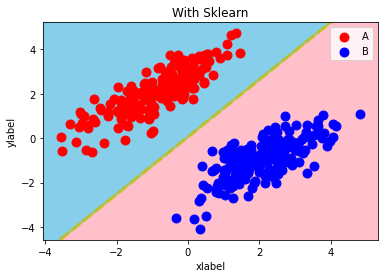

In [37]:
np.random.seed(seed=0)
n_samples = 500
f0= [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

from sklearn.svm import SVC
svc = SVC(random_state=0, C=1e10, kernel='linear')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

decision_region(X_train, y_train, svc, step=0.01, title='With Sklearn', xlabel='xlabel', ylabel='ylabel', target_names=["A" ,'B'])